In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
# Normal KNN Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Predict Quality Column
X = df.drop(columns=['quality'])
y = df['quality']

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (KNN performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and Evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.55


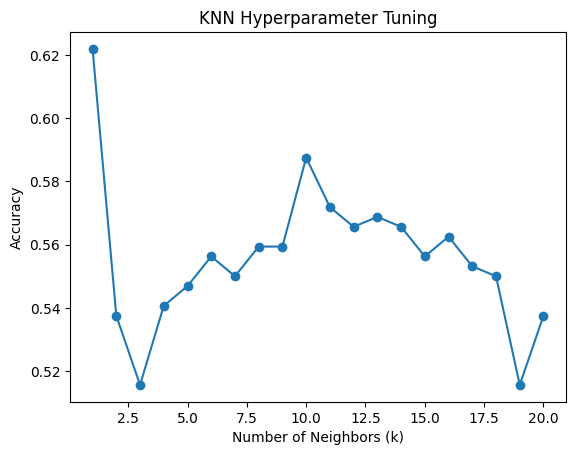

Best k: 1, Accuracy: 0.62


In [9]:
# Finding best K Value

import matplotlib.pyplot as plt

# Try different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

# Best k value
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}, Accuracy: {max(accuracies):.2f}")

In [10]:
# Using different distance metrics
from sklearn.metrics.pairwise import manhattan_distances, cosine_similarity

knn_euclidean = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn_cosine = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)

print("Euclidean Accuracy:", accuracy_score(y_test, knn_euclidean.predict(X_test)))
print("Manhattan Accuracy:", accuracy_score(y_test, knn_manhattan.predict(X_test)))
print("Cosine Accuracy:", accuracy_score(y_test, knn_cosine.predict(X_test)))

Euclidean Accuracy: 0.621875
Manhattan Accuracy: 0.625
Cosine Accuracy: 0.6


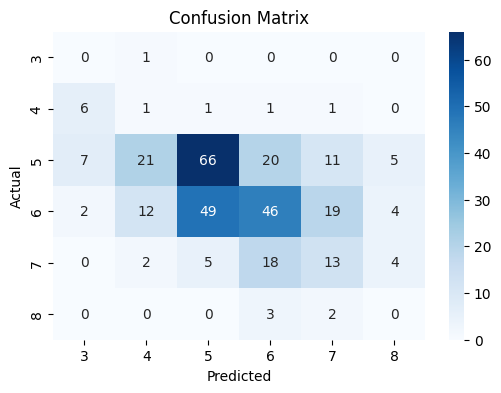

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.03      0.10      0.04        10
           5       0.55      0.51      0.53       130
           6       0.52      0.35      0.42       132
           7       0.28      0.31      0.30        42
           8       0.00      0.00      0.00         5

    accuracy                           0.39       320
   macro avg       0.23      0.21      0.21       320
weighted avg       0.48      0.39      0.43       320



In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))